In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json

In [3]:
filepath = '../results.json'

In [6]:
if not os.path.exists(filepath):
    print(f"Error: The file '{filepath}' was not found.")
else:
    # Use a 'with' statement for clean and safe file handling
    try:
        with open(filepath, 'r') as f:
            results_dict = json.load(f)
        
        print("Successfully loaded results into 'results_dict'.")
        # Optional: Print the keys to verify the data structure
        print("\nKeys in the loaded dictionary (model names):")
        print(list(results_dict.keys()))

    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from '{filepath}'. Check file format.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

Successfully loaded results into 'results_dict'.

Keys in the loaded dictionary (model names):
['CatBoostClassifier', 'LogisticRegression', 'XGBoost', 'RandomForestClassifier', 'SVM']


In [7]:
results_dict

{'CatBoostClassifier': {'model_name': 'CatBoostClassifier',
  'Accuracy': 0.6168,
  'Precision': 0.5987381703470032,
  'Recall (Sensitivity)': 0.5422857142857143,
  'F1_Score': 0.5691154422788606,
  'ROC_AUC': 0.6616489999999999,
  'Confusion_Matrix_Values': {'True Negatives (TN)': 2728,
   'False Positives (FP)': 1272,
   'False Negatives (FN)': 1602,
   'True Positives (TP)': 1898}},
 'LogisticRegression': {'model_name': 'LogisticRegression',
  'Accuracy': 0.6129333333333333,
  'Precision': 0.6000670465973852,
  'Recall (Sensitivity)': 0.5114285714285715,
  'F1_Score': 0.5522134814129261,
  'ROC_AUC': 0.6456361428571429,
  'Confusion_Matrix_Values': {'True Negatives (TN)': 2807,
   'False Positives (FP)': 1193,
   'False Negatives (FN)': 1710,
   'True Positives (TP)': 1790}},
 'XGBoost': {'model_name': 'XGBoost',
  'Accuracy': 0.6181333333333333,
  'Precision': 0.5983910891089109,
  'Recall (Sensitivity)': 0.5525714285714286,
  'F1_Score': 0.5745692216280451,
  'ROC_AUC': 0.65731021

In [38]:
data_list = []
for model_name, metrics in results_dict.items():
    row = {'Model': model_name}
    for metric, value in metrics.items():
        if metric != 'Confusion_Matrix_Values':
            if metric == 'Recall (Sensitivity)':
                row['Recall'] = value
            else:
                row[metric] = value
        else:
            for conf_metric, conf_value in value.items():
                row[conf_metric] = conf_value
    data_list.append(row)

In [39]:
df = pd.DataFrame(data_list, index=[row['Model'] for row in data_list])

In [40]:
df

,Model,model_name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,True Negatives (TN),False Positives (FP),False Negatives (FN),True Positives (TP)
CatBoostClassifier,CatBoostClassifier,CatBoostClassifier,0.616800,0.598738,0.542286,0.569115,0.661649,2728,1272,1602,1898
LogisticRegression,LogisticRegression,LogisticRegression,0.612933,0.600067,0.511429,0.552213,0.645636,2807,1193,1710,1790
XGBoost,XGBoost,XGBoost,0.618133,0.598391,0.552571,0.574569,0.657310,2702,1298,1566,1934
RandomForestClassifier,RandomForestClassifier,RandomForestClassifier,0.615867,0.614928,0.473143,0.534797,0.659571,2963,1037,1844,1656
SVM,SVM,SVM,0.604667,0.603322,0.446286,0.513056,0.638663,2973,1027,1938,1562


In [41]:
df.drop('Model', axis=1, inplace=True)

In [42]:
df['Total Negatives'] = df['True Negatives (TN)'] + df['False Positives (FP)']

In [43]:
df['Total Positives'] = df['True Positives (TP)'] + df['False Negatives (FN)']

In [44]:
df['FPR'] = df['False Positives (FP)'] / df['Total Negatives'] # False Positive Rate

In [45]:
df['FNR'] = df['False Negatives (FN)'] / df['Total Positives'] # False Negative Rate

In [46]:
df['FDR'] = df['False Positives (FP)'] / (df['True Positives (TP)'] + df['False Positives (FP)']) # False Discovery Rate (1 - Precision)

In [47]:
df

,model_name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,True Negatives (TN),False Positives (FP),False Negatives (FN),True Positives (TP),Total Negatives,Total Positives,FPR,FNR,FDR
CatBoostClassifier,CatBoostClassifier,0.616800,0.598738,0.542286,0.569115,0.661649,2728,1272,1602,1898,4000,3500,0.31800,0.457714,0.401262
LogisticRegression,LogisticRegression,0.612933,0.600067,0.511429,0.552213,0.645636,2807,1193,1710,1790,4000,3500,0.29825,0.488571,0.399933
XGBoost,XGBoost,0.618133,0.598391,0.552571,0.574569,0.657310,2702,1298,1566,1934,4000,3500,0.32450,0.447429,0.401609
RandomForestClassifier,RandomForestClassifier,0.615867,0.614928,0.473143,0.534797,0.659571,2963,1037,1844,1656,4000,3500,0.25925,0.526857,0.385072
SVM,SVM,0.604667,0.603322,0.446286,0.513056,0.638663,2973,1027,1938,1562,4000,3500,0.25675,0.553714,0.396678


### Visualizations

In [51]:
try:
    os.makedirs('../visualizations', exist_ok=True)
except Exception as e:
    print(f"An error occurred: {e}")

#### 1. Multi-Metric Bar Chart (ROC-AUC, F1-Score, Accuracy)

<Figure size 1000x600 with 0 Axes>

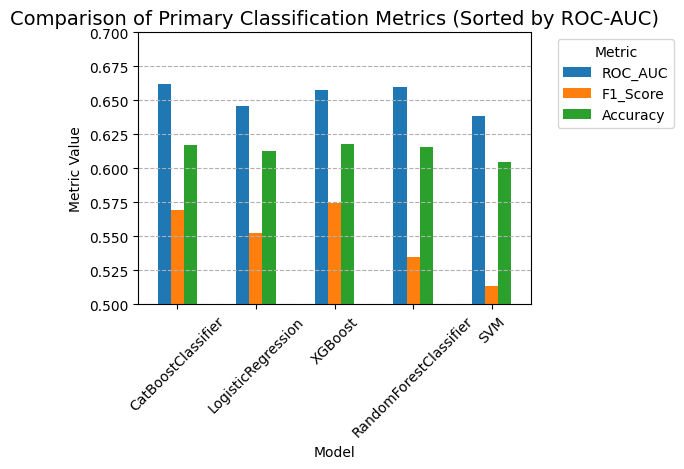

In [ ]:
plot_data = df[['ROC_AUC', 'F1_Score', 'Accuracy']].copy()

plt.figure(figsize=(10, 6))
plot_data.plot(kind='bar', rot=45)
plt.title('Comparison of Primary Classification Metrics (Sorted by ROC-AUC)', fontsize=14)
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.ylim(0.5, 0.7)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('../visualizations/viz_1.png', dpi=300, bbox_inches='tight')
plt.show()

#### 2. Scatter Plot: Precision vs. Recall

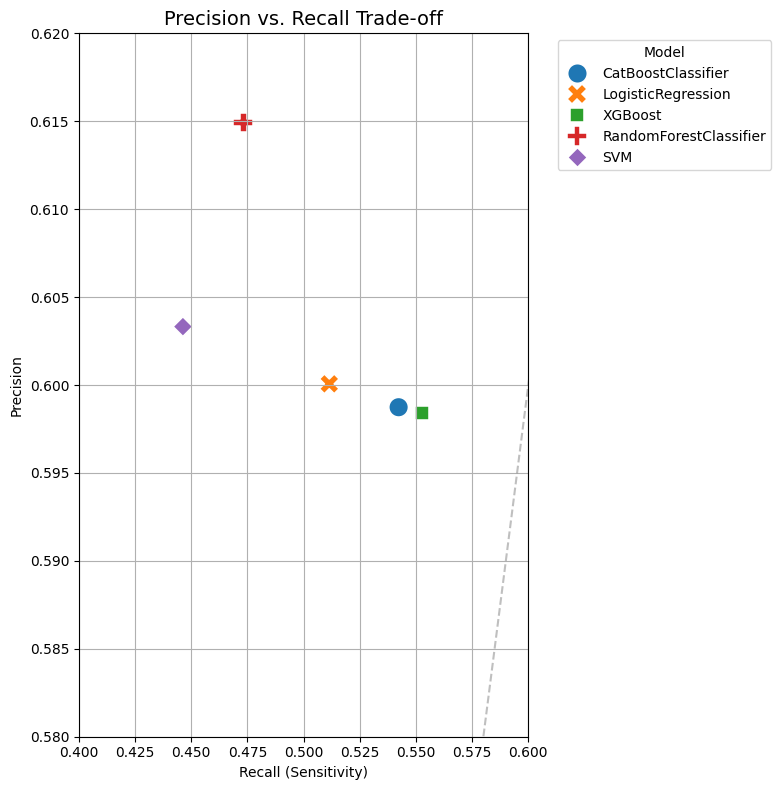

In [56]:
plt.figure(figsize=(8, 8))
# Add 45-degree line for reference
plt.plot([0.4, 0.65], [0.4, 0.65], linestyle='--', color='gray', alpha=0.5)

# This creates the markers and handles the legend
sns.scatterplot(x='Recall', y='Precision', data=df, s=200, hue=df.index, style=df.index)

plt.title('Precision vs. Recall Trade-off', fontsize=14)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.xlim(0.4, 0.6)
plt.ylim(0.58, 0.62)
# This line creates the key to identify the points
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(True)
plt.tight_layout()
plt.savefig('../visualizations/viz_2.png', dpi=300, bbox_inches='tight')
plt.show()

#### 3. F1-Score and ROC-AUC Bar Chart

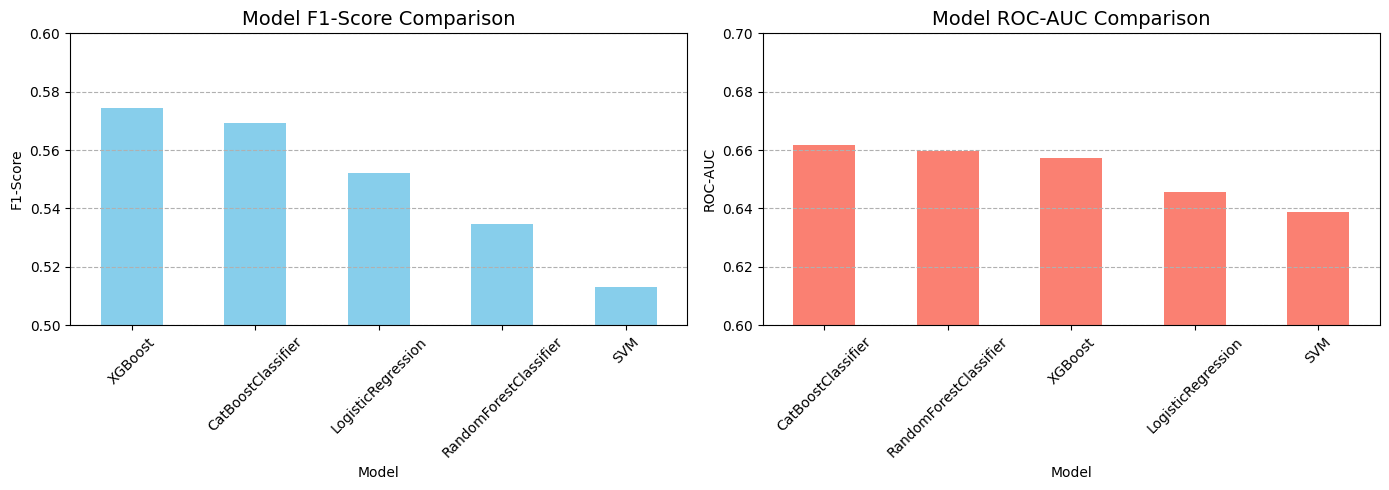

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# F1-Score Plot
df['F1_Score'].sort_values(ascending=False).plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Model F1-Score Comparison', fontsize=14)
axes[0].set_ylabel('F1-Score')
axes[0].set_xlabel('Model')
axes[0].set_ylim(0.5, 0.6)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--')

# ROC-AUC Plot
df['ROC_AUC'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Model ROC-AUC Comparison', fontsize=14)
axes[1].set_ylabel('ROC-AUC')
axes[1].set_xlabel('Model')
axes[1].set_ylim(0.6, 0.7)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('../visualizations/viz_3.png', dpi=300, bbox_inches='tight')
plt.show()

#### 4. Stacked Bar Chart of Confusion Matrix Counts

<Figure size 1000x600 with 0 Axes>

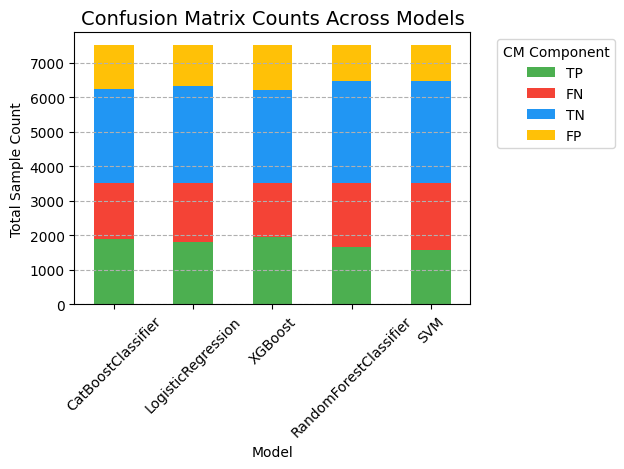

In [59]:
cm_df = df[['True Positives (TP)', 'True Negatives (TN)', 'False Positives (FP)', 'False Negatives (FN)']].copy()
cm_df.columns = ['TP', 'TN', 'FP', 'FN']
cm_df = cm_df[['TP', 'FN', 'TN', 'FP']] # Reorder for visual clarity (TP/FN are Class 1, TN/FP are Class 0)

plt.figure(figsize=(10, 6))
cm_df.plot(kind='bar', stacked=True, rot=45, 
           color=['#4CAF50', '#F44336', '#2196F3', '#FFC107']) # Green/Red for True/False Positives, Blue/Yellow for Negatives
plt.title('Confusion Matrix Counts Across Models', fontsize=14)
plt.ylabel('Total Sample Count')
plt.xlabel('Model')
plt.legend(title='CM Component', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('../visualizations/viz_4.png', dpi=300, bbox_inches='tight')
plt.show()

#### 5. Side-by-Side Bar Chart of True Positives (TP) and False Negatives (FN)

<Figure size 1000x600 with 0 Axes>

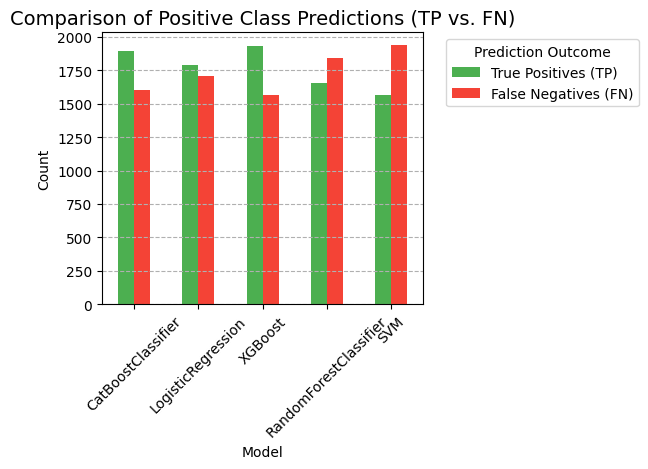

In [61]:
tp_fn_df = df[['True Positives (TP)', 'False Negatives (FN)']].copy()

plt.figure(figsize=(10, 6))
tp_fn_df.plot(kind='bar', rot=45, color=['#4CAF50', '#F44336'])
plt.title('Comparison of Positive Class Predictions (TP vs. FN)', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Model')
plt.legend(title='Prediction Outcome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('../visualizations/viz_5.png', dpi=300, bbox_inches='tight')
plt.show()

#### 6. Side-by-Side Bar Chart of False Positives (FP) and True Negatives (TN)

<Figure size 1000x600 with 0 Axes>

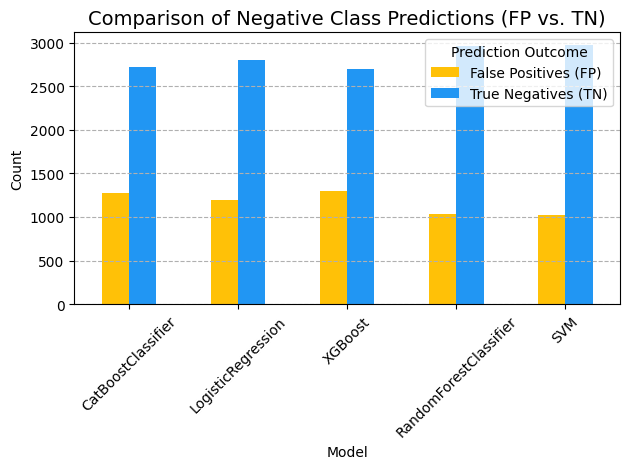

In [62]:
fp_tn_df = df[['False Positives (FP)', 'True Negatives (TN)']].copy()

plt.figure(figsize=(10, 6))
fp_tn_df.plot(kind='bar', rot=45, color=['#FFC107', '#2196F3'])
plt.title('Comparison of Negative Class Predictions (FP vs. TN)', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Model')
plt.legend(title='Prediction Outcome')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('../visualizations/viz_6.png', dpi=300, bbox_inches='tight')
plt.show()

#### 7. Error Rate Comparison (False Positive Rate vs. False Negative Rate)

<Figure size 1000x600 with 0 Axes>

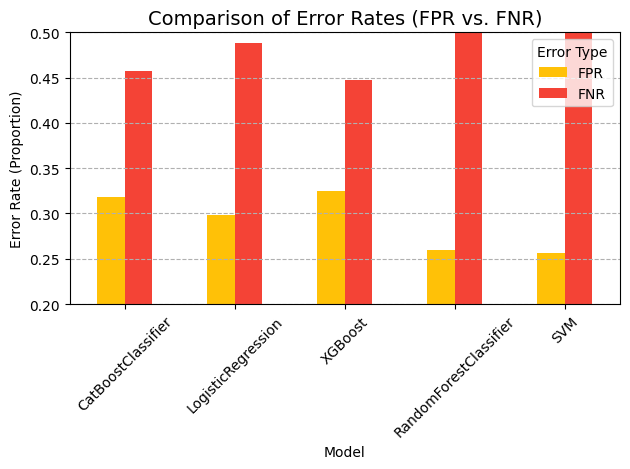

In [63]:
error_rate_df = df[['FPR', 'FNR']].copy()

plt.figure(figsize=(10, 6))
error_rate_df.plot(kind='bar', rot=45, color=['#FFC107', '#F44336'])
plt.title('Comparison of Error Rates (FPR vs. FNR)', fontsize=14)
plt.ylabel('Error Rate (Proportion)')
plt.xlabel('Model')
plt.legend(title='Error Type')
plt.ylim(0.2, 0.5)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('../visualizations/viz_7.png', dpi=300, bbox_inches='tight')
plt.show()

#### 8. Stacked Bar Chart of Proportions within Predicted Positive Class (Precision vs. FDR)

<Figure size 1000x600 with 0 Axes>

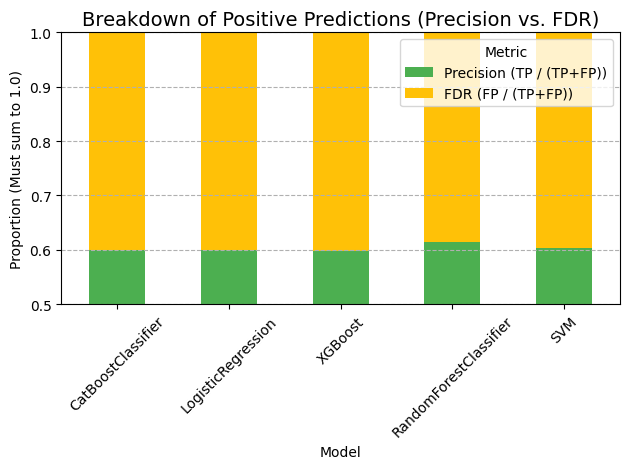

In [64]:
precision_fdr_df = df[['Precision', 'FDR']].copy()

plt.figure(figsize=(10, 6))
precision_fdr_df.plot(kind='bar', stacked=True, rot=45, color=['#4CAF50', '#FFC107'])
plt.title('Breakdown of Positive Predictions (Precision vs. FDR)', fontsize=14)
plt.ylabel('Proportion (Must sum to 1.0)')
plt.xlabel('Model')
plt.legend(['Precision (TP / (TP+FP))', 'FDR (FP / (TP+FP))'], title='Metric')
plt.ylim(0.5, 1.0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('../visualizations/viz_8.png', dpi=300, bbox_inches='tight')
plt.show()

#### 9. Metric Heatmap

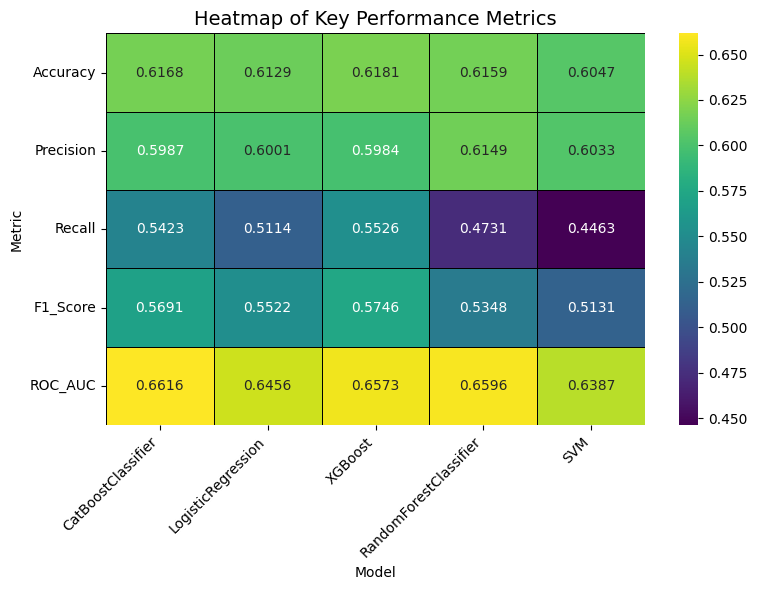

In [65]:
heatmap_data = df[['Accuracy', 'Precision', 'Recall', 'F1_Score', 'ROC_AUC']].T

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis", linewidths=.5, linecolor='black')
plt.title('Heatmap of Key Performance Metrics', fontsize=14)
plt.ylabel('Metric')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig('../visualizations/viz_9.png', dpi=300, bbox_inches='tight')
plt.show()

#### 10. Ranked Bar Chart of Precision

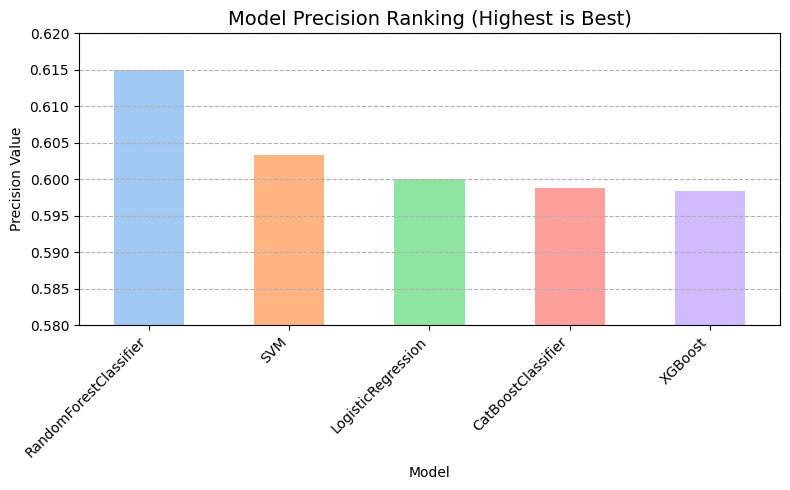

In [66]:
plt.figure(figsize=(8, 5))
df['Precision'].sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("pastel"))
plt.title('Model Precision Ranking (Highest is Best)', fontsize=14)
plt.ylabel('Precision Value')
plt.xlabel('Model')
plt.ylim(0.58, 0.62)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('../visualizations/viz_10.png', dpi=300, bbox_inches='tight')
plt.show()